## Tarea
Va a consistir de 4 pasos basados en lo que aprendimos de como manipular los INEGI shape files.

## Primero
#### Vas a escoger 5 estados y vas a graficar sus vecinos como vimos en el otro archivo. A cada uno de estos grupos los llamaremos grupos de estados.
#### Usa el shapefile de los estados


In [17]:
import geopandas as gpd
file_path_estados = '../../ShapeFilesFiles/Estados/conjunto_de_datos/00ent.shp'
gdf_estados = gpd.read_file(file_path_estados)
print(gdf_estados.head())

  CVEGEO CVE_ENT                NOMGEO  \
0     01      01        Aguascalientes   
1     02      02       Baja California   
2     03      03   Baja California Sur   
3     04      04              Campeche   
4     05      05  Coahuila de Zaragoza   

                                            geometry  
0  POLYGON ((2470517.824 1155028.588, 2470552.248...  
1  MULTIPOLYGON (((1313480.513 1831458.607, 13135...  
2  MULTIPOLYGON (((1694656.344 1227647.637, 16946...  
3  MULTIPOLYGON (((3544897.199 946994.621, 354491...  
4  POLYGON ((2469954.193 1978522.993, 2469982.807...  


Estado: Colima
Vecinos: Jalisco, Michoacán de Ocampo



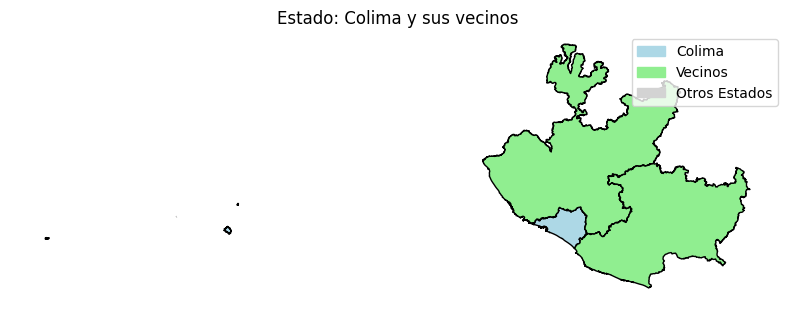

Estado: Chiapas
Vecinos: Oaxaca, Tabasco, Veracruz de Ignacio de la Llave



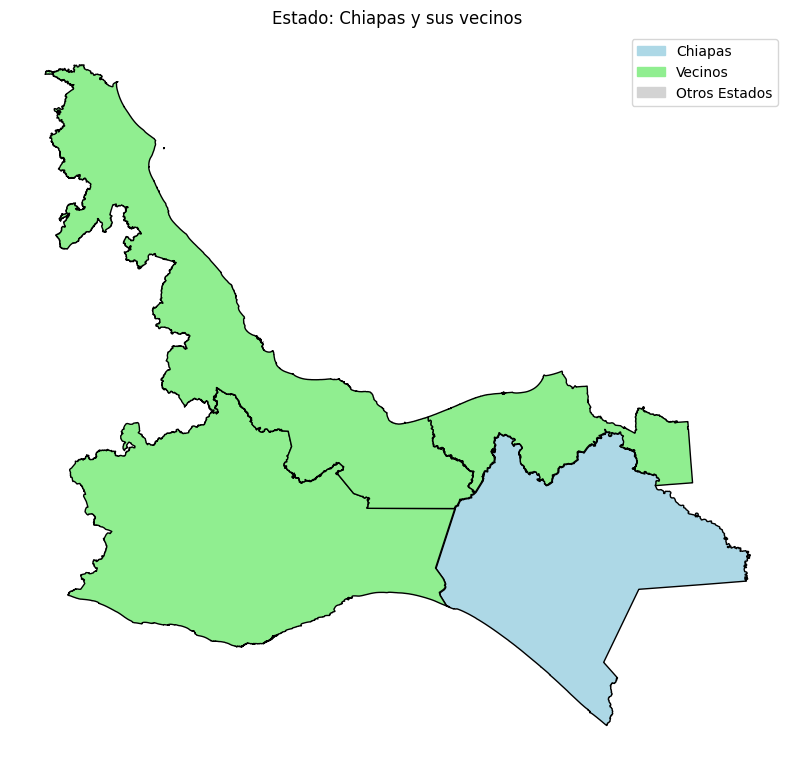

Estado: Nayarit
Vecinos: Durango, Jalisco, Sinaloa, Zacatecas



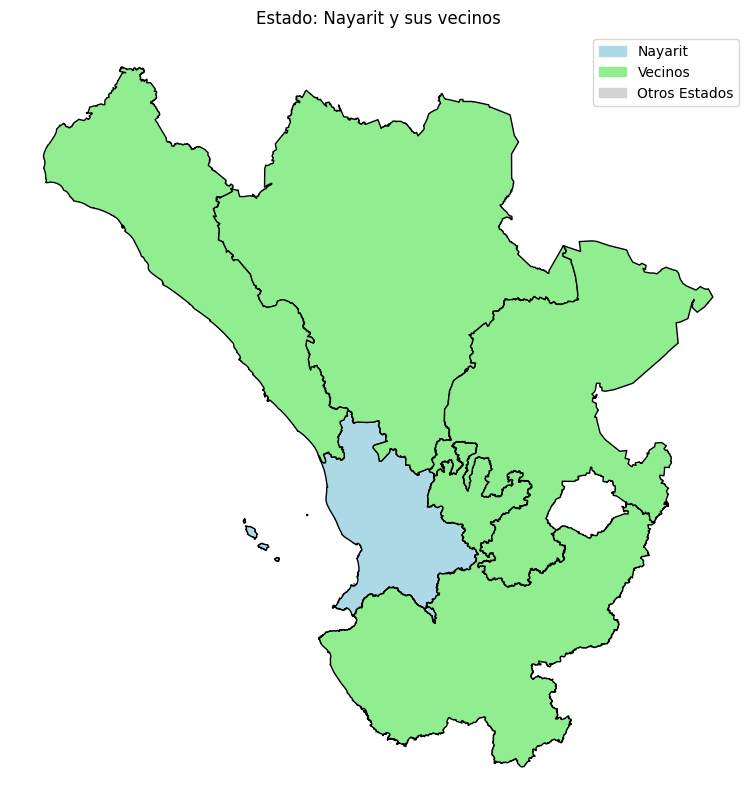

Estado: Puebla
Vecinos: Guerrero, Hidalgo, México, Morelos, Oaxaca, Tlaxcala, Veracruz de Ignacio de la Llave



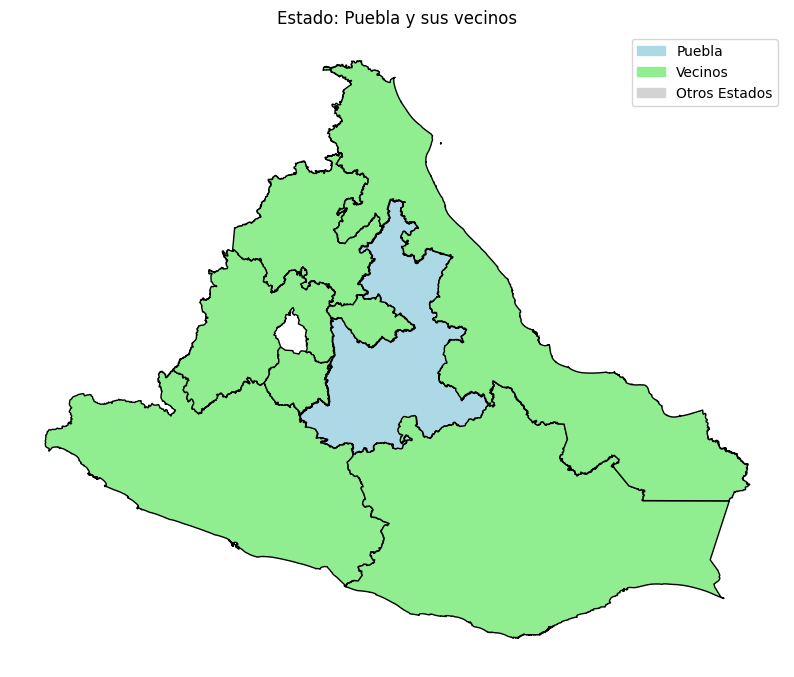

Estado: Tlaxcala
Vecinos: Hidalgo, México, Puebla



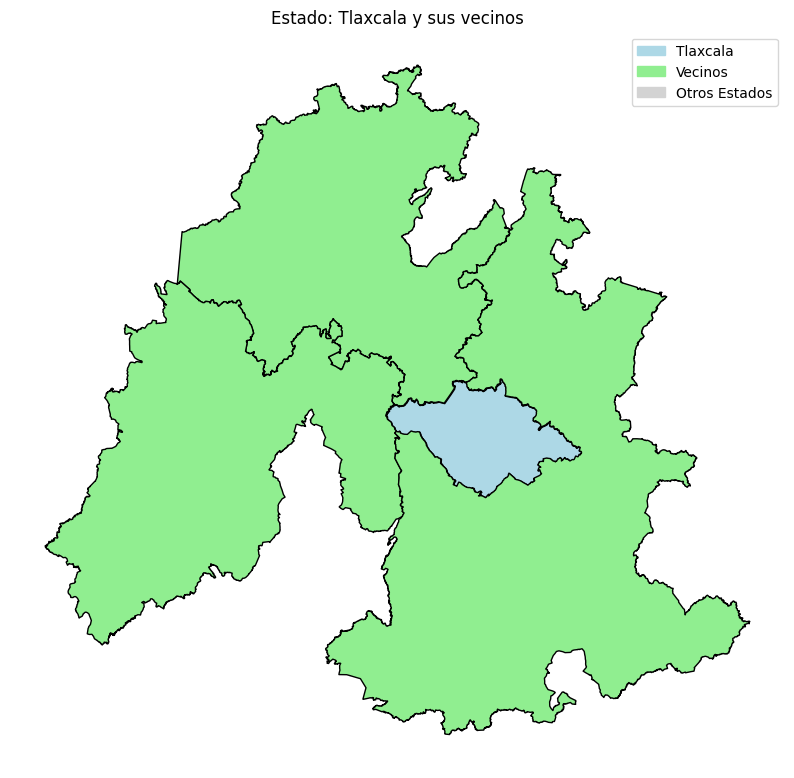

In [36]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Seleccionar los estados de interés
estados = ['Colima', 'Puebla', 'Tlaxcala', 'Nayarit', 'Chiapas']
gdf_estados_reducido = gdf_estados[gdf_estados['NOMGEO'].isin(estados)]

# Crear un diccionario para almacenar los vecinos
grupos_de_estados = {}

# Iterar sobre cada estado en el dataframe reducido
for index, row in gdf_estados_reducido.iterrows():
    # Obtener la geometría del estado actual
    estado_geom = row['geometry']
    
    # Encontrar los estados que intersectan con el estado actual (incluye fronteras y superposiciones)
    gdf_vecinos = gdf_estados[gdf_estados.geometry.intersects(estado_geom)]
    
    # Eliminar el estado mismo de la lista de vecinos (si se incluye)
    gdf_vecinos = gdf_vecinos[gdf_vecinos['NOMGEO'] != row['NOMGEO']]
    
    # Obtener los nombres de los vecinos
    vecinos_nombres = gdf_vecinos['NOMGEO'].tolist()
    
    # Almacenar en el diccionario
    grupos_de_estados[row['NOMGEO']] = vecinos_nombres

# Graficar cada estado y sus vecinos
for estado, vecinos in grupos_de_estados.items():
    print(f"Estado: {estado}")
    print(f"Vecinos: {', '.join(vecinos)}\n")
    
    # Filtrar los estados vecinos
    gdf_vecinos = gdf_estados[gdf_estados['NOMGEO'].isin(vecinos)]
    
    # Crear una figura y un eje para el gráfico
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Graficar el estado de interés con un color especial (por ejemplo, en azul)
    gdf_estados[gdf_estados['NOMGEO'] == estado].plot(ax=ax, color='lightblue', edgecolor='black')
    
    # Graficar los estados vecinos con otro color (por ejemplo, en verde)
    gdf_vecinos.plot(ax=ax, color='lightgreen', edgecolor='black')
    
    # Crear manualmente las leyendas
    legend_handles = [
        mpatches.Patch(color='lightblue', label=f'{estado}'),
        mpatches.Patch(color='lightgreen', label='Vecinos'),
        mpatches.Patch(color='lightgrey', label='Otros Estados')
    ]
    
    # Personalizar el gráfico
    ax.set_title(f"Estado: {estado} y sus vecinos")
    ax.legend(handles=legend_handles, loc='upper right')
    ax.axis('off')  # Ocultar los ejes para un mejor gráfico
    
    # Mostrar el gráfico
    plt.show()

In [26]:
grupos_de_estados

{'Colima': ['Jalisco', 'Michoacán de Ocampo'],
 'Chiapas': ['Oaxaca', 'Tabasco', 'Veracruz de Ignacio de la Llave'],
 'Nayarit': ['Durango', 'Jalisco', 'Sinaloa', 'Zacatecas'],
 'Puebla': ['Guerrero',
  'Hidalgo',
  'México',
  'Morelos',
  'Oaxaca',
  'Tlaxcala',
  'Veracruz de Ignacio de la Llave'],
 'Tlaxcala': ['Hidalgo', 'México', 'Puebla']}

## Segundo
### En cada grupo de estados vas a graficar las farmacias que se encuentran en el área, al igual que un círculo a su alrededor que tenga un radio de igual longitud que la distancia de esa farmacia a la siguiente farmacia más cercana.

In [27]:
file_path_farmacias = "../../ShapeFilesFiles/servicios_de_salud_shp/conjunto_de_datos/denue_inegi_62_.shp"
gdf_farmacias = gpd.read_file(file_path_farmacias)
print(gdf_estados.head())

  CVEGEO CVE_ENT                NOMGEO  \
0     01      01        Aguascalientes   
1     02      02       Baja California   
2     03      03   Baja California Sur   
3     04      04              Campeche   
4     05      05  Coahuila de Zaragoza   

                                            geometry  
0  POLYGON ((2470517.824 1155028.588, 2470552.248...  
1  MULTIPOLYGON (((1313480.513 1831458.607, 13135...  
2  MULTIPOLYGON (((1694656.344 1227647.637, 16946...  
3  MULTIPOLYGON (((3544897.199 946994.621, 354491...  
4  POLYGON ((2469954.193 1978522.993, 2469982.807...  


In [ ]:
# Ponemos las mismas coordenadas (unidades de medida) para ambos dataframes
if gdf_farmacias.crs != gdf_estados.crs:
    gdf_farmacias = gdf_farmacias.to_crs(gdf_estados.crs)
    print("Reproyección completada. Nuevo CRS de las farmacias:", gdf_farmacias.crs)

In [ ]:
# Iterar por cada grupo de estados en el diccionario
for estado_principal, estados_vecinos in grupos_de_estados.items():
    # Agregar el estado principal al grupo
    estados_grupo_completo = [estado_principal] + estados_vecinos
    
    # Filtrar farmacias en los estados del grupo
    gdf_farmacias_reducido = gdf_farmacias[gdf_farmacias['entidad'].isin(estados_grupo_completo)]
    
    # Filtrar geometrías del grupo de estados
    estados_geom_grupo = gdf_estados[gdf_estados['NOMGEO'].isin(estados_grupo_completo)]
    
    # Filtrar farmacias dentro del grupo de estados
    farmacias_grupo = gpd.sjoin(gdf_farmacias_reducido, estados_geom_grupo, how="inner", predicate="within")
    
    # Calcular distancias a la farmacia más cercana
    if len(farmacias_grupo) > 1:
        farmacias_grupo['nearest_distance'] = farmacias_grupo.geometry.apply(
            lambda x: farmacias_grupo.distance(x).nsmallest(2).iloc[-1] # Distancia al vecino más cercano, es 2 porque el primero es la misma farmacia
        )
    else:
        farmacias_grupo['nearest_distance'] = 0  # Caso especial: solo una farmacia en el grupo
        
    # Filtrar farmacias con distancias válidas (> 0)
    farmacias_grupo = farmacias_grupo[farmacias_grupo['nearest_distance'] > 0]

    # Graficar el grupo de estados
    fig, ax = plt.subplots(figsize=(12, 12))
    estados_geom_grupo.plot(ax=ax, color='lightgrey', edgecolor='black', label='Estados')

    # Graficar las farmacias
    farmacias_grupo.plot(ax=ax, color='red', markersize=10, label='Farmacias')

    # Graficar los círculos alrededor de las farmacias
    for _, farmacia in farmacias_grupo.iterrows():
        circle = farmacia.geometry.buffer(farmacia['nearest_distance'])
        if not circle.is_empty:  # Verificar que la geometría no esté vacía
            gpd.GeoSeries([circle]).plot(ax=ax, color='blue', alpha=0.2, edgecolor='blue', linewidth=0.5)

    # Personalizar el gráfico
    ax.set_title(f"Farmacias en el grupo de estados de {estado_principal}")
    ax.axis('off')
    ax.legend()

    # Mostrar el gráfico
    plt.show()

Como les dije, conceptualmente si sirve y hasta una gráfica de un estado sale, pero con los vecinos y demás cada una tarda más de 30 minutos, entonces no lo pude imprimir.

## Tercero
### Por grupo de estados debes calcular cual es la farmacia que en promedio está más alejada de el resto de farmacios.
### Debes graficar las distancias de esta farmacia al resto de las farmacias en el grupo de estados.

In [ ]:
from shapely.geometry import Point  # Para crear o manipular puntos geométricos

# Iterar por cada grupo de estados
for estado_principal, estados_vecinos in grupos_de_estados.items():
    # Crear el grupo de estados (estado principal + vecinos)
    grupo_completo = [estado_principal] + estados_vecinos
    
    # Filtrar farmacias en los estados del grupo
    gdf_farmacias_reducido = gdf_farmacias[gdf_farmacias['entidad'].isin(estados_grupo_completo)]
    
    # Filtrar geometrías del grupo de estados
    estados_geom_grupo = gdf_estados[gdf_estados['NOMGEO'].isin(estados_grupo_completo)]
    
    # Filtrar farmacias dentro del grupo de estados
    farmacias_grupo = gpd.sjoin(gdf_farmacias_reducido, estados_geom_grupo, how="inner", predicate="within")
    
    # Si no hay farmacias en el grupo, continuar con el siguiente
    if farmacias_grupo.empty:
        print(f"No hay farmacias en el grupo de estados de {estado_principal}.")
        continue

    # Calcular la distancia promedio desde cada farmacia al resto
    def average_distance_to_others(farmacia, gdf):
        # Excluir la farmacia actual del cálculo
        other_farmacias = gdf[gdf.geometry != farmacia]
        if other_farmacias.empty:
            return 0  # Si no hay otras farmacias, la distancia promedio es 0
        return other_farmacias.distance(farmacia).mean()

    # Calcular la distancia promedio para cada farmacia con la función definida arriba
    farmacias_grupo['avg_distance'] = farmacias_grupo.geometry.apply(
        lambda x: average_distance_to_others(x, farmacias_grupo)
    )

    # Identificar la farmacia con la mayor distancia promedio
    farmacia_mas_alejada = farmacias_grupo.loc[farmacias_grupo['avg_distance'].idxmax()]

    # Graficar las distancias de la farmacia seleccionada al resto
    fig, ax = plt.subplots(figsize=(10, 10))

    # Graficar el grupo de estados
    estados_geom_grupo.plot(ax=ax, color='lightgrey', edgecolor='black', label='Estados')

    # Graficar todas las farmacias
    farmacias_grupo.plot(ax=ax, color='blue', markersize=10, label='Farmacias')

    # Destacar la farmacia más alejada
    gpd.GeoSeries([farmacia_mas_alejada.geometry]).plot(ax=ax, color='red', markersize=50, label='Farmacia más alejada')

    # Conectar la farmacia más alejada al resto con líneas
    for _, farmacia in farmacias_grupo.iterrows():
        line = gpd.GeoSeries([Point(farmacia_mas_alejada.geometry), Point(farmacia.geometry)]).unary_union
        gpd.GeoSeries([line]).plot(ax=ax, color='green', alpha=0.5)

    # Personalizar el gráfico
    ax.set_title(f"Distancias desde la farmacia más alejada en el grupo de {estado_principal}")
    ax.axis('off')
    ax.legend()

    # Mostrar el gráfico
    plt.show()


Igual, conceptualmente sirvió, pero es muy pesada la operación, sobretodo con los grupos (incluyendo vecinos), estuvo corriendo como 30 minutos.

## Cuarto
### Calcula cual es el grupo de estados con mayor distancia promedio entre sus farmacias.
### Luego grafica el país completo con el shapefile de estados y grafica el grupo de estados con mayor distancia promedio entre farmacias de un color distinto.

In [ ]:
from shapely.geometry import Point  # Para crear o manipular puntos geométricos
import numpy as np

# Variable para almacenar las distancias promedio de cada grupo
distancias_promedio_grupos = {}

# Iterar por cada grupo de estados
for estado_principal, estados_vecinos in grupos_de_estados.items():
    # Crear el grupo de estados (estado principal + vecinos)
    grupo_completo = [estado_principal] + estados_vecinos
    
    # Filtrar farmacias en los estados del grupo
    gdf_farmacias_reducido = gdf_farmacias[gdf_farmacias['entidad'].isin(estados_grupo_completo)]
    
    # Filtrar geometrías del grupo de estados
    estados_geom_grupo = gdf_estados[gdf_estados['NOMGEO'].isin(estados_grupo_completo)]
    
    # Filtrar farmacias dentro del grupo de estados
    farmacias_grupo = gpd.sjoin(gdf_farmacias_reducido, estados_geom_grupo, how="inner", predicate="within")
    
    # Si no hay farmacias en el grupo, continuar con el siguiente
    if farmacias_grupo.empty:
        distancias_promedio_grupos[estado_principal] = 0
        continue

    # Calcular la distancia promedio entre todas las farmacias del grupo
    distancias = []
    for _, farmacia in farmacias_grupo.iterrows():
        # Excluir la farmacia actual del cálculo
        other_farmacias = farmacias_grupo[farmacias_grupo.geometry != farmacia.geometry]
        if not other_farmacias.empty:
            distancia_promedio = other_farmacias.distance(farmacia.geometry).mean()
            distancias.append(distancia_promedio)
    
    # Guardar la distancia promedio del grupo
    distancia_promedio_grupo = np.mean(distancias)
    distancias_promedio_grupos[estado_principal] = distancia_promedio_grupo

# Identificar el grupo con la mayor distancia promedio
grupo_max_distancia = max(distancias_promedio_grupos, key=distancias_promedio_grupos.get)
estados_grupo_max = [grupo_max_distancia] + grupos_de_estados[grupo_max_distancia]

# Graficar el país completo y destacar el grupo con mayor distancia promedio
fig, ax = plt.subplots(figsize=(12, 12))

# Graficar todos los estados en gris
gdf_estados.plot(ax=ax, color='lightgrey', edgecolor='black', label='Otros Estados')

# Destacar el grupo con la mayor distancia promedio
gdf_estados[gdf_estados['NOMGEO'].isin(estados_grupo_max)].plot(ax=ax, color='orange', edgecolor='black', label='Grupo Máximo')

# Personalizar el gráfico
ax.set_title("Grupo de Estados con Mayor Distancia Promedio entre Farmacias")
ax.axis('off')
ax.legend()

# Mostrar el gráfico
plt.show()

# Imprimir los resultados
print(f"El grupo de estados con mayor distancia promedio es: {grupo_max_distancia}")
print(f"Distancia promedio: {distancias_promedio_grupos[grupo_max_distancia]:.2f}")
